In [70]:
# Import relevant Python libraries and modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm



In [71]:
# Load the dataset into a DataFrame and save in a variable
marketing_sales_data = pd.read_csv("E:\\Data\\Road To data Science\\Datasets\\_marketing_sales_data.csv")

In [72]:
#Data exploration
marketing_sales_data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [73]:
# Display number of rows, number of columns
rows,columns = marketing_sales_data.shape
print("rows : ",rows)
print("columns : ",columns)


rows :  572
columns :  5


In [74]:
#check for null values
marketing_sales_data.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [75]:
#drop null values
marketing_sales_data = marketing_sales_data.dropna(axis=0)

In [76]:
#check again and confirm that changes made
marketing_sales_data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

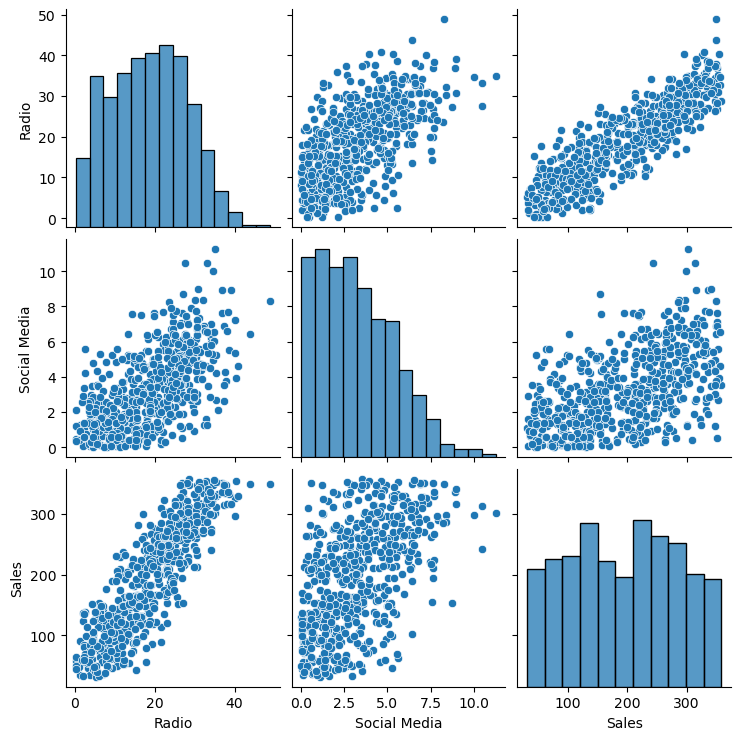

In [77]:
#create a plot of pairwise relationships
sns.pairplot(marketing_sales_data)

In the scatter plot of Sales over Radio, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

In [78]:
#Model Building
ols_data = marketing_sales_data[["Radio","Sales"]]

# Write the linear regression formula
ols_formula = "Sales ~ Radio"

# Implement OLS (ordinary least squares) approach for linear regression
OLS= ols(data=ols_data, formula=ols_formula)

# Fit the model to the data
model = OLS.fit()


In [79]:
#Results and evaluation

# Get summary of results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          2.07e-176
Time:                        01:50:39   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope.

The y-intercept is 41.5326.

The slope is 8.1733.

Linear Equation : y = slope * x + y-intercept
sales = 8.1733 * radio promotion budget + 41.5326


The slope in this context means:

One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.

Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

<Axes: xlabel='Radio', ylabel='Sales'>

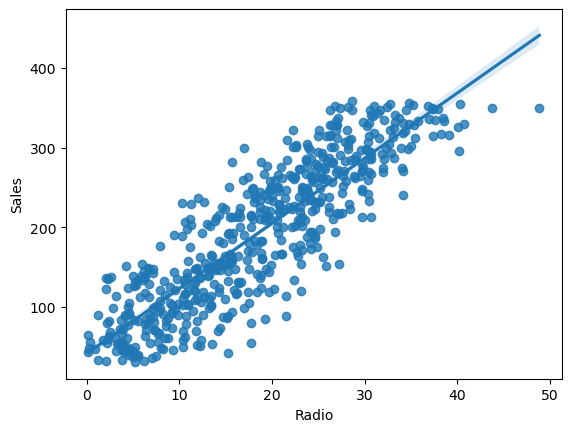

In [80]:
#checking model assumptions
# Plot the OLS data with the best fit regression line

sns.regplot(x = "Radio" , y = "Sales", data = ols_data)

The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

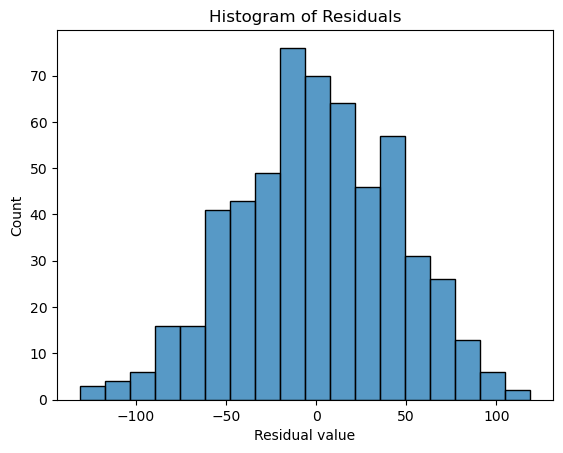

In [81]:
#Check the normality assumption.
residuals = model.resid

# Visualize the distribution of the residuals
fig = sns.histplot(residuals)
fig.set_xlabel("Residual value")
fig.set_title("Histogram of Residuals")
plt.show()

Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

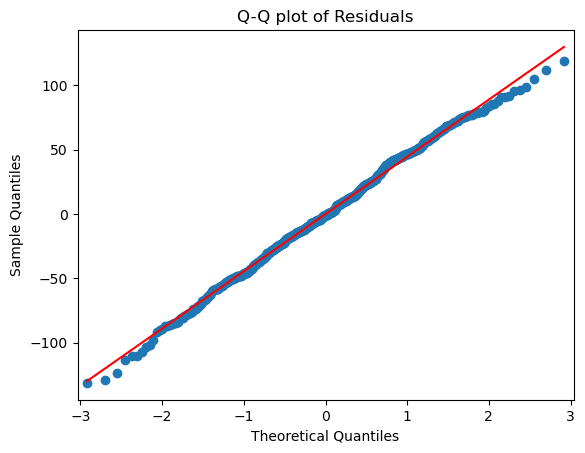

In [82]:
#Create a Q-Q plot to confirm the assumption of normality.

sm.qqplot(residuals,line = 's')
plt.title("Q-Q plot of Residuals")
plt.show()

In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

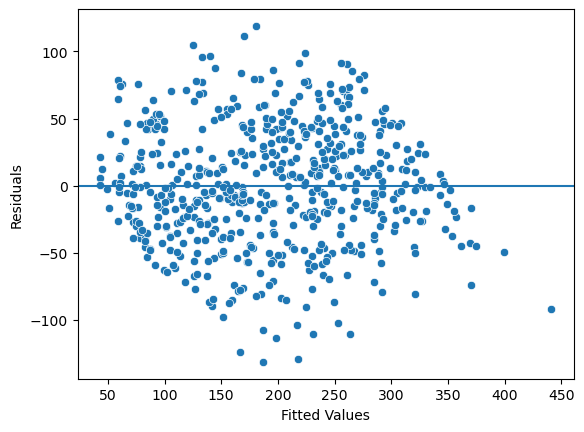

In [83]:
#Check the assumptions of independent observation and homoscedasticity.

fitted_values = model.predict(ols_data["Radio"])

# Create a scatterplot of residuals against fitted values
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

### Conclusion:
Project Findings:

Model Summary: Simple Linear Regression on marketing sales data.

Y-intercept: 41.5326, Slope: 8.1733.

Interpretation: A $1 million increase in radio promotion budget leads to an average sales increase of $8.1733 million.

Statistical Significance: p-value = 0.000 (significant at 0.05 level).

Hypothesis Testing: Reject the null hypothesis (no relationship between radio budget and sales).

Confidence Interval: 95% CI for the slope: [7.791, 8.555], meaning the true slope likely falls in this range.
